In [11]:
import json
import numpy as np
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

base_dir = '../Roberta/results/base/'
seconds = ['0', '30', '60', '300', '600', '900']


### Import and Combine Metrics

In [12]:

def combine_results(model_name):
    d = {}

    with open(str(base_dir + model_name + '_30' + '.json'), 'r') as f1, open(str(base_dir + model_name + '_60' + '.json'), 'r') as f2, open(str(base_dir + model_name + '_300' + '.json'), 'r') as f3, open(str(base_dir + model_name + '_600' + '.json'), 'r') as f4, open(str(base_dir + model_name + '_900' + '.json'), 'r') as f5 :
        results_30 = json.load(f1)
        results_60 = json.load(f2)
        results_300 = json.load(f3)
        results_600 = json.load(f4)
        results_900 = json.load(f5)

        for key in results_30.keys():
            d[key] = results_30[key][0:2] + [results_60[key][-1]] + [results_300[key][-1]] + [results_600[key][-1]] + [results_900[key][-1]]
    
    return d

adapter = combine_results('adapter')
lora = combine_results('lora')
base_model = combine_results('base_model')
prefix = combine_results('prefix')

results = {
    "Base Model" : base_model,
    'LoRA Layers' : lora,
    'Adapter Layers' : adapter,
    'Prefix Tuning' : prefix
}

In [33]:
key = 'val_wikitext_losses'

for model in results.keys():
    print(results[model][key][-1])

0.25990313068032267
0.36402813643217086
0.2436002731323242
0.1953507110476494


### Evaluating Before and After Metrics

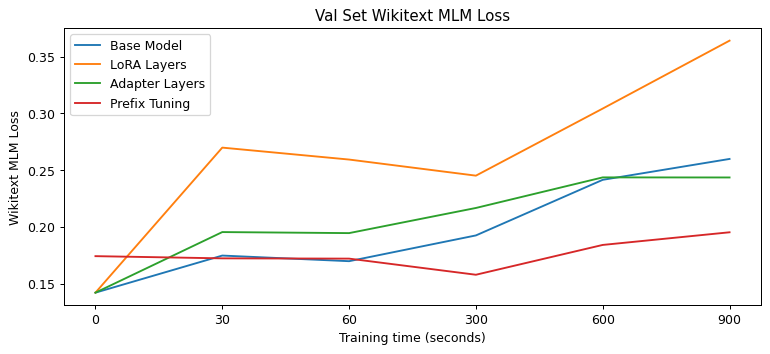

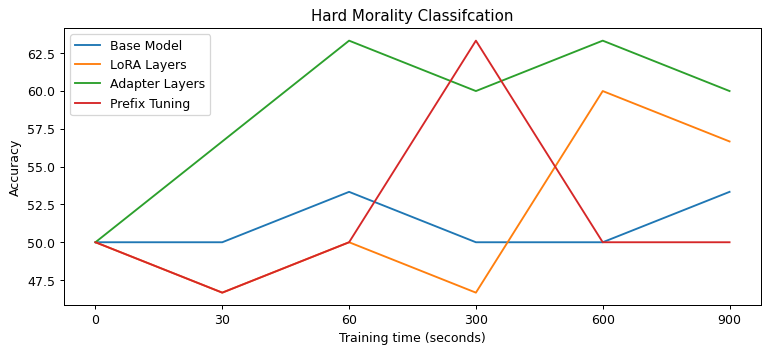

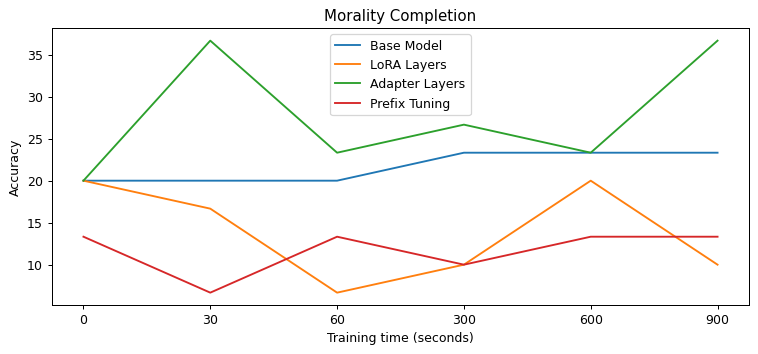

In [22]:
# Wikitext Loss 
figure(figsize=(10, 4), dpi=90)
key = 'val_wikitext_losses'

for model in results.keys():
    plt.plot(seconds, results[model][key], label = model)
plt.xlabel("Training time (seconds)")
plt.ylabel("Wikitext MLM Loss")
plt.title("Val Set Wikitext MLM Loss")
plt.legend()

plt.show()

# Morality Classification Accuracy 
figure(figsize=(10, 4), dpi=90)
key = 'val_morality_classifcation_accs'

for model in results.keys():
    plt.plot(seconds, results[model][key], label = model)
plt.xlabel("Training time (seconds)")
plt.ylabel("Accuracy")
plt.title("Hard Morality Classifcation")
plt.legend()

plt.show()


# Morality Prediction Accuracy
figure(figsize=(10, 4), dpi=90)
key = 'val_moral_completion_accs'

for model in results.keys():
    plt.plot(seconds, results[model][key], label = model)
plt.xlabel("Training time (seconds)")
plt.ylabel("Accuracy")
plt.title("Morality Completion")
plt.legend()

plt.show()


### Evaluating Validation Metrics of Models


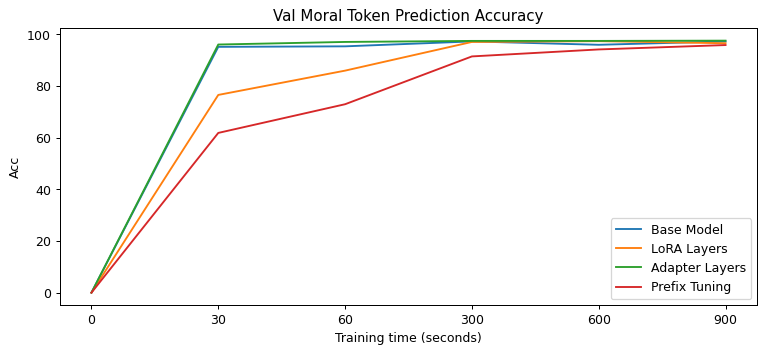

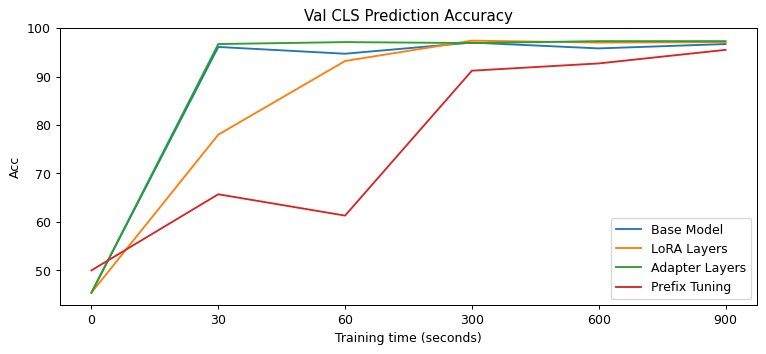

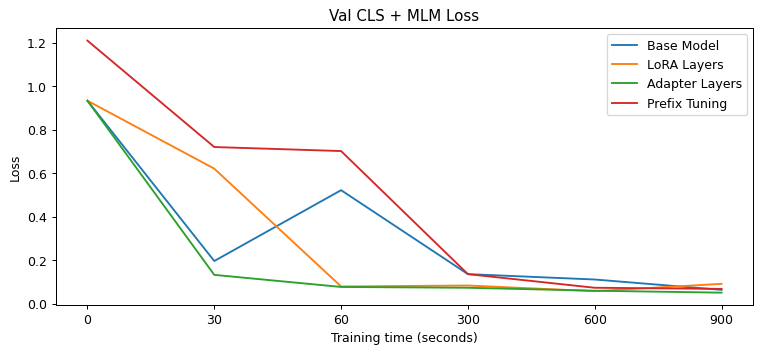

In [21]:

# Moral Token prediction
figure(figsize=(10, 4), dpi=90)
key = 'val_moral_token_accs_unmasked'

for model in results.keys():
    plt.plot(seconds, results[model][key], label = model)
plt.xlabel("Training time (seconds)")
plt.ylabel("Acc")
plt.title("Val Moral Token Prediction Accuracy")
plt.legend()

plt.show()

# CLS prediction accuracy
figure(figsize=(10, 4), dpi=90)
key = 'val_cls_accs_unmasked'

for model in results.keys():
    plt.plot(seconds, results[model][key], label = model)
plt.xlabel("Training time (seconds)")
plt.ylabel("Acc")
plt.title("Val CLS Prediction Accuracy")
plt.legend()

plt.show()


# CLS + MLM Val Loss
figure(figsize=(10, 4), dpi=90)
for model in results.keys():
    loss_combined = []
    for data in zip(results[model]['val_losses_cls_unmasked'],results[model]['val_losses_lm']):
        loss_combined.append(data[0] + data[1])

    plt.plot(seconds, loss_combined, label = model)
plt.xlabel("Training time (seconds)")
plt.ylabel("Loss")
plt.title("Val CLS + MLM Loss")
plt.legend()

plt.show()